<a href="https://colab.research.google.com/github/swguo/Audio-AI/blob/main/%E8%AA%9E%E9%9F%B3%E8%AD%98%E5%88%A5_faster_whisper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Faster whisper
Faster-Whisper 是一個經過優化的高效版本，基於 OpenAI 的 Whisper 模型，專為更快速且輕量化的語音轉文字處理而設計。

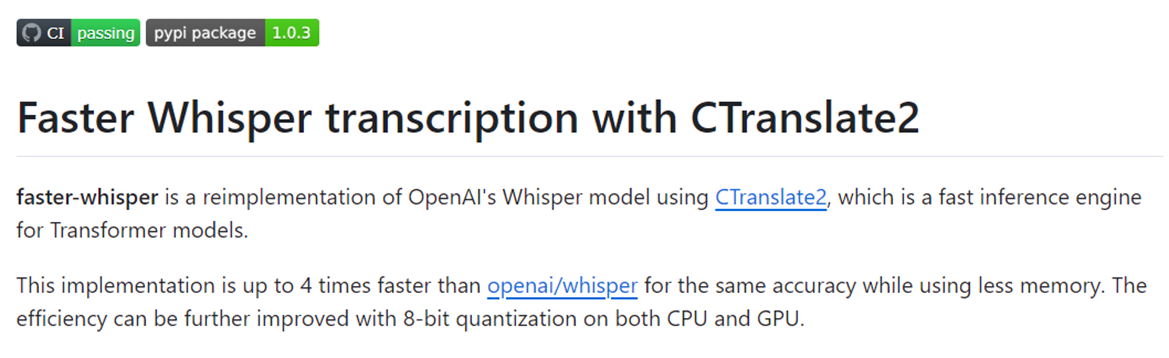

## 安裝 libcublas11

用來支持 GPU 執行語音模型的套件

In [ ]:
!apt install libcublas11

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libcublaslt11
The following NEW packages will be installed:
  libcublas11 libcublaslt11
0 upgraded, 2 newly installed, 0 to remove and 49 not upgraded.
Need to get 226 MB of archives.
After this operation, 498 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/multiverse amd64 libcublaslt11 amd64 11.7.4.6~11.5.1-1ubuntu1 [148 MB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/multiverse amd64 libcublas11 amd64 11.7.4.6~11.5.1-1ubuntu1 [78.2 MB]
Fetched 226 MB in 13s (18.1 MB/s)
Selecting previously unselected package libcublaslt11:amd64.
(Reading database ... 123629 files and directories currently installed.)
Preparing to unpack .../libcublaslt11_11.7.4.6~11.5.1-1ubuntu1_amd64.deb ...
Unpacking libcublaslt11:amd64 (11.7.4.6~11.5.1-1ubuntu1) ...
Selecting previously unselected package libcublas11:amd64.


## 安裝 faster-whisper 本尊

In [ ]:
!pip install faster-whisper

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 32.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.5/33.5 MB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.2/37.2 MB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 51.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 7.3 MB/s eta 0:00:00


## 主程式

指定 large-v2 模型
採用 timeline 方式呈現識別結果

In [ ]:
from faster_whisper import WhisperModel
import os
from google.colab import files

model_size = "large-v2" # tiny, base, small, medium, large, large-v2, large-v3
mode = "timeline" # normal 一般, timeline 加入時間軸, subtitle 產生成字幕檔格式

# Run on GPU with FP16
model = WhisperModel(model_size, device="cuda", compute_type="float16")

# 設定檔案路徑
audio_path = "input.m4a" # 替換成你的檔案名稱

segments, info = model.transcribe(audio_path, beam_size=5, initial_prompt="繁體")

transcription = ""

# 1 以下為一般版本
if mode == "normal":
  transcription_segments = [segment.text for segment in segments]
  transcription = "，".join(transcription_segments)

# 2 以下為加入時間軸版本
elif mode == "timeline":
  for segment in segments:
    transcription += "[%.2fs -> %.2fs] %s\n" % (segment.start, segment.end, segment.text)

# 3 以下為產生字幕檔的版本
elif mode == "subtitle":
  for i, segment in enumerate(segments, 1):
    start_hours, start_remainder = divmod(segment.start, 3600)
    start_minutes, start_seconds = divmod(start_remainder, 60)
    end_hours, end_remainder = divmod(segment.end, 3600)
    end_minutes, end_seconds = divmod(end_remainder, 60)
    transcription += "%d\n%02d:%02d:%06.3f --> %02d:%02d:%06.3f\n%s\n\n" % (
      i,
      start_hours, start_minutes, start_seconds,
      end_hours, end_minutes, end_seconds,
      segment.text
    )

print(transcription)

# 獲取不帶副檔名的檔案名稱
file_name = os.path.splitext(os.path.basename(audio_path))[0]

# 將結果保存為txt檔案
with open(f"{file_name}.txt", "w") as file:
  file.write(transcription)
  files.download(f"{file_name}.txt")

[1.00s -> 4.50s] 好 妳好 我是那個 潮酸醫師
[4.50s -> 6.00s] 請問妳是
[6.00s -> 7.00s] 陳瑩瑩
[7.00s -> 10.00s] 好 妳好 那我們今天有什麼不舒服呢
[10.00s -> 13.00s] 醫生我這邊 這邊很痠
[13.00s -> 14.50s] 右腰很痠
[14.50s -> 18.00s] 那請問這樣痛大概多久了
[18.00s -> 20.00s] 大概有一個禮拜了
[20.00s -> 22.00s] 已經有一個禮拜了喔
[22.00s -> 25.00s] 那除了就是腰痠 然後腰痛之外
[25.00s -> 26.50s] 有沒有其他的不舒服
[26.50s -> 28.00s] 有時候會痛到這裡
[28.00s -> 29.00s] 有時候會往前痛
[29.00s -> 31.00s] 對 這邊
[31.00s -> 32.00s] 往前痛
[32.00s -> 35.00s] 那會不會有一些就是噁心嘔吐啊
[35.00s -> 36.00s] 或是拉肚子的症狀
[36.00s -> 37.00s] 有
[37.00s -> 38.00s] 也有是不是
[38.00s -> 39.00s] 是吐嗎 還是
[39.00s -> 40.00s] 就是很想吐
[40.00s -> 41.00s] 有點想
[41.00s -> 43.00s] 那有拉肚子嗎
[43.00s -> 45.00s] 拉肚子好像還好
[45.00s -> 46.00s] 好像還好喔
[46.00s -> 49.00s] 好 那除了痛以外
[49.00s -> 51.00s] 小便有沒有什麼不舒服
[51.00s -> 53.00s] 小便不會不舒服
[53.00s -> 55.00s] 可是看起來紅紅的
[55.00s -> 57.00s] 喔 有一點血尿就對了
[57.00s -> 58.00s] 那有發燒嗎
[58.00s -> 59.00s] 沒有啊
[59.00s -> 60.00s] 沒有發燒啦
[60.00s -> 61.00s] 好
[61.00s -> 65.00s] 那本身有在固定服用什麼藥物嗎
[65.00s -> 66.00s] 沒有
[66.00s -> 68.00s] 沒有高血壓或是糖尿病

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>